# Importing Libraries

In [189]:
import pandas as pd
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [190]:
!pip install contractions

In [191]:
import os
import numpy as np
import contractions as ctc
import re

In [192]:
from tensorflow.keras import models,layers
import tensorflow.keras.backend as K
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [193]:
from sklearn.metrics import f1_score

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading data and preprocessing

In [195]:
df_train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/ADL_PROJECT1/snli_1.0/snli_1.0_train.txt",sep="\t",na_filter=False,usecols=["gold_label","sentence1","sentence2"])

In [196]:
df_train.head()

,gold_label,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,neutral,Children smiling and waving at camera,They are smiling at their parents
4,entailment,Children smiling and waving at camera,There are children present


In [197]:
df_train=df_train[df_train['gold_label']!='-']

In [198]:
df_train.gold_label.unique()

array(['neutral', 'contradiction', 'entailment'], dtype=object)

In [199]:
labels={'neutral':0,'contradiction':0,'entailment':1}

In [200]:
df_train["labels"]=df_train["gold_label"].map(labels)

In [201]:
df_train.head()

,gold_label,sentence1,sentence2,labels
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,0
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",0
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",1
3,neutral,Children smiling and waving at camera,They are smiling at their parents,0
4,entailment,Children smiling and waving at camera,There are children present,1


In [202]:
df_train.shape

(549367, 4)

In [203]:
df_train.sentence1[0]

'A person on a horse jumps over a broken down airplane.'

In [204]:
df_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/ADL_PROJECT1/snli_1.0/snli_1.0_test.txt",sep="\t",na_filter=False,usecols=["gold_label","sentence1","sentence2"])

In [205]:
df_test=df_test[df_test['gold_label']!='-']

In [206]:
df_test.gold_label.unique()

array(['neutral', 'entailment', 'contradiction'], dtype=object)

In [207]:
df_test["labels"]=df_test["gold_label"].map(labels)

In [208]:
df_test.head()

,gold_label,sentence1,sentence2,labels
0,neutral,This church choir sings to the masses as they ...,The church has cracks in the ceiling.,0
1,entailment,This church choir sings to the masses as they ...,The church is filled with song.,1
2,contradiction,This church choir sings to the masses as they ...,A choir singing at a baseball game.,0
3,neutral,"A woman with a green headscarf, blue shirt and...",The woman is young.,0
4,entailment,"A woman with a green headscarf, blue shirt and...",The woman is very happy.,1


In [209]:
df_val=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATASETS/ADL_PROJECT1/snli_1.0/snli_1.0_dev.txt",sep="\t",na_filter=False,usecols=["gold_label","sentence1","sentence2"])

In [210]:
df_val=df_val[df_val['gold_label']!='-']

In [211]:
df_val.gold_label.unique()

array(['neutral', 'entailment', 'contradiction'], dtype=object)

In [212]:
df_val["labels"]=df_val["gold_label"].map(labels)

In [213]:
df_val.shape

(9842, 4)

In [214]:
df_val.sentence2[1:12]

1                       Two woman are holding packages.
2                  The men are fighting outside a deli.
3        Two kids in numbered jerseys wash their hands.
4              Two kids at a ballgame wash their hands.
5                   Two kids in jackets walk to school.
6            A woman drinks her coffee in a small cafe.
7     A man selling donuts to a customer during a wo...
8                   A man selling donuts to a customer.
9                                    boys play football
10                                 dog eats out of bowl
11                             boys scoring a touchdown
Name: sentence2, dtype: object

In [215]:
## Putting space b/w Special Characters
def is_special(text):
    rem = ''
    for i in text: 
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
            rem=rem+i
            rem = rem + ' '
    return rem

In [216]:
## removing extra spsces from text
def rem_extra(text):
    rem=re.sub(' +', ' ',text)
    return str(rem).strip()

In [217]:
def contraction_fix(text):
    return ctc.fix(text)

In [218]:
def lower1(text):
    return text.lower()

In [219]:
## Calculate max word in Text cell
def get_max_length1(df):
    max_length = 0
    for row in df['sentence1']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

In [220]:
## Calculate max word in Text cell
def get_max_length2(df):
    max_length = 0
    for row in df['sentence2']:
        if len(row.split(" ")) > max_length:
            max_length = len(row.split(" "))
    return max_length

In [221]:
## expanding contraction 
df_train.sentence1=df_train.sentence1.apply(contraction_fix)
df_train.sentence2=df_train.sentence2.apply(contraction_fix)

In [222]:
df_train.sentence1=df_train.sentence1.apply(is_special)
df_train.sentence2=df_train.sentence2.apply(is_special)

In [223]:
df_train.sentence1=df_train.sentence1.apply(rem_extra)
df_train.sentence2=df_train.sentence2.apply(rem_extra)

In [224]:
df_train.sentence1=df_train.sentence1.apply(lower1)
df_train.sentence2=df_train.sentence2.apply(lower1)

In [225]:
df_train.sentence1[1]

'a person on a horse jumps over a broken down airplane .'

In [226]:
df_train.sentence2[1]

'a person is at a diner , ordering an omelette .'

In [227]:
get_max_length1(df_train)

82

In [228]:
get_max_length2(df_train)

62

In [229]:
df_val.sentence1=df_val.sentence1.apply(contraction_fix)
df_val.sentence2=df_val.sentence2.apply(contraction_fix)

In [230]:
df_val.sentence1=df_val.sentence1.apply(is_special)
df_val.sentence2=df_val.sentence2.apply(is_special)

In [231]:
df_val.sentence1=df_val.sentence1.apply(rem_extra)
df_val.sentence2=df_val.sentence2.apply(rem_extra)

In [232]:
df_val.sentence1=df_val.sentence1.apply(lower1)
df_val.sentence2=df_val.sentence2.apply(lower1)

In [233]:
get_max_length1(df_val)

59

In [234]:
get_max_length2(df_val)

55

In [235]:
df_test.sentence1=df_test.sentence1.apply(contraction_fix)
df_test.sentence2=df_test.sentence2.apply(contraction_fix)

In [236]:
df_test.sentence1=df_test.sentence1.apply(is_special)
df_test.sentence2=df_test.sentence2.apply(is_special)

In [237]:
df_test.sentence1=df_test.sentence1.apply(rem_extra)
df_test.sentence2=df_test.sentence2.apply(rem_extra)

In [238]:
df_test.sentence1=df_test.sentence1.apply(lower1)
df_test.sentence2=df_test.sentence2.apply(lower1)

In [239]:
get_max_length1(df_test)

57

In [240]:
get_max_length2(df_test)


30

In [241]:
df_train.head()

,gold_label,sentence1,sentence2,labels
0,neutral,a person on a horse jumps over a broken down a...,a person is training his horse for a competiti...,0
1,contradiction,a person on a horse jumps over a broken down a...,"a person is at a diner , ordering an omelette .",0
2,entailment,a person on a horse jumps over a broken down a...,"a person is outdoors , on a horse .",1
3,neutral,children smiling and waving at camera,they are smiling at their parents,0
4,entailment,children smiling and waving at camera,there are children present,1


# Tokenizing and converting into fix length seq by zero padding

In [242]:
## Tokenize
tk=keras.preprocessing.text.Tokenizer(filters='"#*+/:;<=>@[\\]^_{|}~\t\n')

In [243]:
tk.fit_on_texts(df_train.sentence1)

In [244]:
len(tk.word_index)

17990

In [245]:
tk.fit_on_texts(df_train.sentence2)

In [246]:
len(tk.word_index)

33228

In [247]:
size_of_vocabulary=len(tk.word_index)+1

In [248]:
max_len1=84
max_len2=64


In [249]:
def prep_text(txt, tk, max_seq_len):
    text_seqs = tk.texts_to_sequences(txt)
    return tf.keras.preprocessing.sequence.pad_sequences(text_seqs, maxlen=max_seq_len)

In [250]:
## sequnces after padding
data_train_sen1 = prep_text(df_train.sentence1, tk,max_len1)
data_train_sen2 = prep_text(df_train.sentence2, tk,max_len2)

In [251]:
## sequnces after padding
data_val_sen1 = prep_text(df_val.sentence1, tk,max_len1)
data_val_sen2 = prep_text(df_val.sentence2, tk,max_len2)

In [252]:
## sequnces after padding
data_test_sen1 = prep_text(df_test.sentence1, tk,max_len1)
data_test_sen2 = prep_text(df_test.sentence2, tk,max_len2)

In [253]:
# data_train=np.concatenate((data_train_sen1,data_train_sen2),axis=1)
# data_val=np.concatenate((data_val_sen1,data_val_sen2),axis=1)
# data_test=np.concatenate((data_test_sen1,data_test_sen2),axis=1)

In [254]:
# data_train.shape


In [255]:
# data_test.shape

# Load pretrained glove word vectors

In [256]:
## Load pretrained datasets
# load the whole embedding into memory
def load_Mat(addrs,size_of_vocabulary,tk):
    embeddings_index = dict()
    f = open(addrs)
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

    f.close()
    print('Loaded %s word vectors.' % len(embeddings_index))
    
    # create a weight matrix for words in training docs
    embedding_matrix = np.zeros((size_of_vocabulary, 300))
    c=0
    for word, i in tk.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            c+=1
        else:
            #print(word)
            pass
    print('No. of out of vocab word in train set= %s'%(size_of_vocabulary-c))
    
    return embedding_matrix

In [257]:
embd_g=load_Mat("/content/drive/MyDrive/Colab Notebooks/DATASETS/embeddings/glove.6B.300d.txt",size_of_vocabulary,tk)

Loaded 400000 word vectors.
No. of out of vocab word in train set= 5988


# Monitor val_loss

In [258]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min')

# Model Design with Bi-LSTM

In [290]:
tf.keras.backend.clear_session()
inp1 = layers.Input(shape=(max_len1,))
inp2 = layers.Input(shape=(max_len2,))
x1 = layers.Embedding(size_of_vocabulary, 300, weights=[embd_g],trainable=False)(inp1)
x2 = layers.Embedding(size_of_vocabulary, 300, weights=[embd_g],trainable=False)(inp2)
x1 = layers.Bidirectional(layers.LSTM(128, dropout=0.2))(x1)
x2 = layers.Bidirectional(layers.LSTM(128, dropout=0.2))(x2)
x3 = layers.multiply([x1, x2])
x4 = K.abs(layers.subtract([x1,x2]))
x=layers.Concatenate(axis=1)([x1,x2,x3,x4])
x = layers.Dense(128,activation='relu')(x)
out = layers.Dense(1,activation='sigmoid')(x)
model1 = Model([inp1,inp2], out)
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 84)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 84, 300)      9968700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 64, 300)      9968700     input_2[0][0]                    
______________________________________________________________________________________________

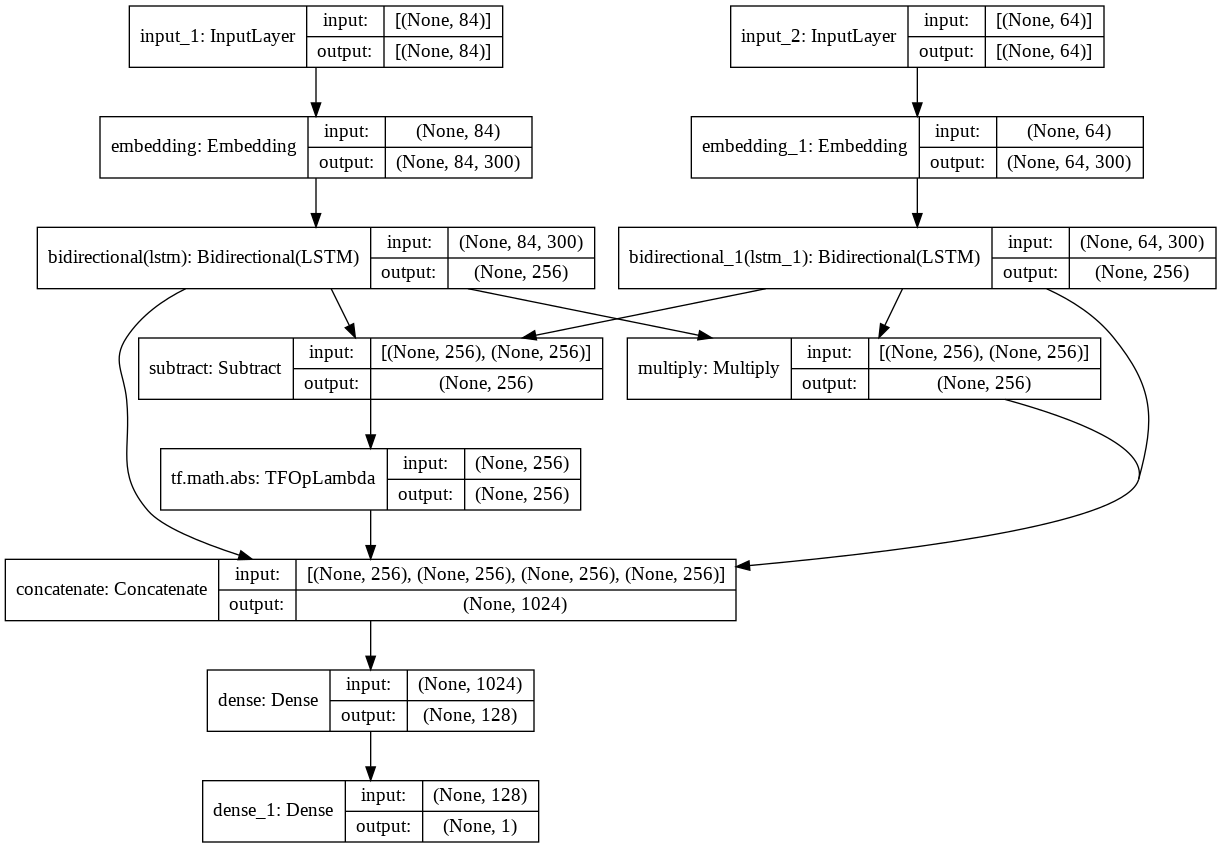

In [291]:
tf.keras.utils.plot_model(model1,show_shapes=True,expand_nested=True)

In [ ]:
model1.fit([data_train_sen1,data_train_sen2],df_train.labels.values,batch_size=1024,epochs=30,callbacks=[es],validation_data=([data_val_sen1,data_val_sen2],df_val.labels.values))

Epoch 1/30
482/537 [=========================>....] - ETA: 20s - loss: 0.4820 - accuracy: 0.7622

In [267]:
 model1.save('/content/drive/MyDrive/Colab Notebooks/DATASETS/assgn4/model1.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [274]:
model1=load_model('/content/drive/MyDrive/Colab Notebooks/DATASETS/assgn4/model1.h5')

In [275]:
model1.evaluate([data_test_sen1,data_test_sen2],df_test.labels.values)

307/307 [==============================] - 11s 30ms/step - loss: 0.2886 - accuracy: 0.8806


[0.2886148691177368, 0.8805985450744629]

In [276]:
y_pred=np.argmax(model1.predict([data_test_sen1,data_test_sen2]),axis=1)

In [277]:
f1_score(df_test.labels.values,y_pred1)

0.7721851145038169